# Submitted by- Manasi Potre LGMVI_Task_2_ Stock Market Prediction and Forecasting using Stacked LSTM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
f=pd.read_csv("data.txt")

In [4]:
f.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
f.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
f['Date']= pd.to_datetime(f['Date'])
print(type(f.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
df = f.sort_values(by='Date')
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [9]:
df.reset_index(inplace= True)

In [10]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [11]:
df_close=df['Close']

Text(0.5, 1.0, 'Stock Prediction')

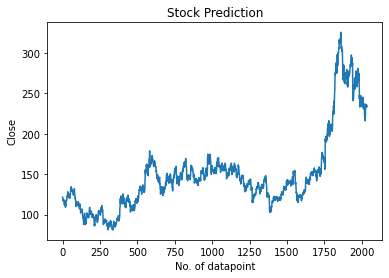

In [12]:
plt.plot(df_close)
plt.xlabel('No. of datapoint')
plt.ylabel('Close')
plt.title('Stock Prediction')

In [13]:
f1=df['Close']

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
f1=scaler.fit_transform(np.array(df_close).reshape(-1,1))
f1


array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [16]:
training_size=int(len(f1)*0.70)
test_size=len(f1)-training_size
train_data,test_data=f1[0:training_size,:],f1[training_size:len(f1),:1]

In [17]:
training_size,test_size

(1424, 611)

In [18]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)


In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
19/19 [==============================] - 18s 445ms/step - loss: 0.0136 - accuracy: 8.4034e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 2/10
19/19 [==============================] - 5s 287ms/step - loss: 0.0023 - accuracy: 8.4034e-04 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 3/10
19/19 [==============================] - 5s 272ms/step - loss: 0.0011 - accuracy: 8.4034e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 4/10
19/19 [==============================] - 6s 293ms/step - loss: 9.2150e-04 - accuracy: 8.4034e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 5/10
19/19 [==============================] - 6s 306ms/step - loss: 8.0518e-04 - accuracy: 8.4034e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 6/10
19/19 [==============================] - 6s 304ms/step - loss: 7.8422e-04 - accuracy: 8.4034e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 7/10
19/19 [==============================] - 6s 301ms/step - loss: 7.7116e-04 - 

In [26]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))


0.02675876011630778

In [28]:
from sklearn import metrics
np.round(metrics.r2_score(y_train, train_predict),2)


0.93

In [29]:
math.sqrt(mean_squared_error(ytest, test_predict))


0.05789877983261599

In [30]:
np.round(metrics.r2_score(ytest, test_predict),2)


0.95

In [31]:
train_predict =scaler.inverse_transform(train_predict)
test_predict =scaler.inverse_transform(test_predict)
y_train =scaler.inverse_transform(y_train.reshape(-1,1))
ytest =scaler.inverse_transform(ytest.reshape(1,-1))


In [34]:
look_back = 100
trainPredictPlot = np.empty_like(f1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

In [36]:
testPredictPlot = np.empty_like(f1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(f1) - 1, :] = test_predict

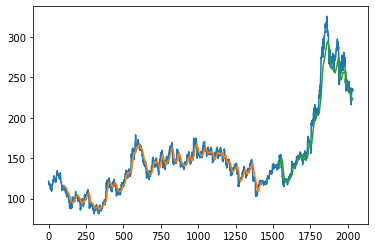

In [38]:
plt.plot(scaler.inverse_transform(f1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
x_input = test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [41]:
from numpy import array
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

In [42]:
while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5878712]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

In [53]:
day_new = np.arange(0,0)
day_pred = np.arange(30,1)

In [48]:
f2 = f1.tolist()
f2.extend(lst_output)

In [50]:
len(f1)

2035

ValueError: x and y must have same first dimension, but have shapes (0,) and (30, 1)

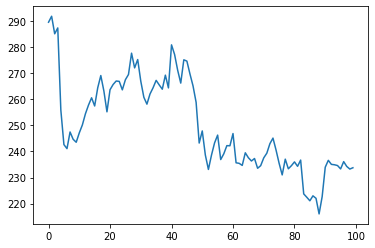

In [55]:
plt.plot(day_new, scaler.inverse_transform(f1[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.xlabel('No. of datapoint')
plt.ylabel('Close')
plt.title('Stock Prediction')